In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [4]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [5]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [60]:
print('Самый холодный год: ', df.groupby(df.Day.dt.year).agg({'t':'mean'}).sort_values(by='t').iloc[0].name)
print('Самый теплый год: ', df.groupby(df.Day.dt.year).agg({'t':'mean'}).sort_values(by='t').iloc[-1].name)

Самый холодный год:  2012
Самый теплый год:  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [55]:
df[(df.Day.dt.month == 1)&(df.t>=0)].groupby(df.Day.dt.year).agg({'t':'count'}).sort_values(by='t').iloc[-1].name

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [63]:
df[df.Day.dt.month.isin([6, 7, 8])].groupby(df.Day.dt.year).agg({'t':'mean'}).sort_values(by='t').iloc[0].name

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [95]:
df_diff = df.copy()
df_diff['t'] = abs(df['t'].diff(periods=-1))
df_diff.dropna().sort_values(by='t').iloc[-1].Day

Timestamp('2014-05-26 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

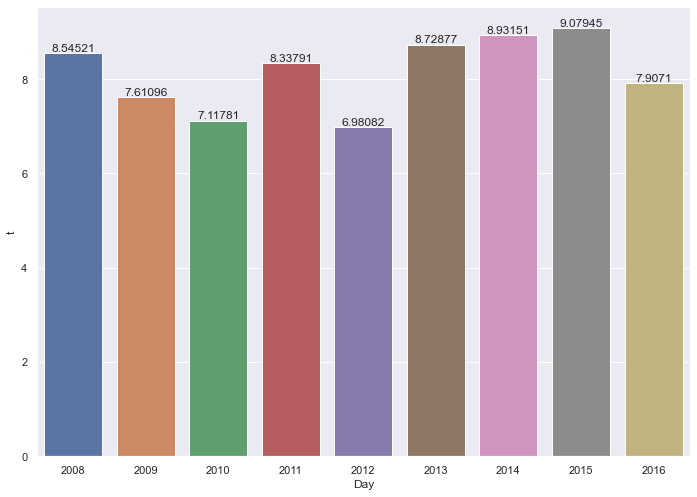

In [121]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

means = df.groupby(df.Day.dt.year).agg({'t':'mean'}).reset_index()
ax = sns.barplot(x='Day', y='t', data=means)
for i in ax.containers:
    ax.bar_label(i,)